#Team Names


*   Mohamed Elhamamsy
*   Amira Mamdouh
*   Nada Essam



# Importing Libraries, reading datasets, joining datasets on keys, and reducing memory

In [ ]:
## This Python 3 environment comes with many helpful analytics libraries installed
## It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
## For example, here's several helpful packages to load
#
#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#
## Input data files are available in the read-only "../input/" directory
## For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
#
## You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
## You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**this notebook originally ran on kaggle, running on colab consumes all of the memory and the session restarts starting from the ridge regression**

---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "nadaabosreea"
os.environ['KAGGLE_KEY'] = "eaba0c6a0fab3b62edd306a05623b022"

In [ ]:
 #!kaggle competitions download -c ashrae-energy-prediction

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
building_metadata.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
weather_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
weather_test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#!unzip "/content/train.csv.zip"
# !unzip "/content/test.csv.zip"
#!unzip "/content/weather_train.csv.zip"
# !unzip "/content/weather_test.csv.zip"

Archive:  /content/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train.csv               
Archive:  /content/weather_train.csv.zip
replace weather_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: weather_train.csv       


In [ ]:
building_metadata = pd.read_csv("/content/building_metadata.csv")
train_data = pd.read_csv("/content/train.csv", parse_dates=['timestamp'], infer_datetime_format=True)
#test_data = pd.read_csv("/content/test.csv", parse_dates=['timestamp'], infer_datetime_format=True)
weather_train = pd.read_csv("/content/weather_train.csv", parse_dates=['timestamp'], infer_datetime_format=True)
#weather_test = pd.read_csv("/content/weather_test.csv", parse_dates=['timestamp'], infer_datetime_format=True)

In [ ]:
weather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [ ]:
building_metadata

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


> ## Joining the buildings data with their metadata



In [ ]:
train_data=pd.merge(left=train_data, right=building_metadata, left_on='building_id', right_on='building_id')

In [ ]:
train_data

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01 00:00:00,0.00,0,Education,7432,2008.0,NaN
1,0,0,2016-01-01 01:00:00,0.00,0,Education,7432,2008.0,NaN
2,0,0,2016-01-01 02:00:00,0.00,0,Education,7432,2008.0,NaN
3,0,0,2016-01-01 03:00:00,0.00,0,Education,7432,2008.0,NaN
4,0,0,2016-01-01 04:00:00,0.00,0,Education,7432,2008.0,NaN
...,...,...,...,...,...,...,...,...,...
20216095,403,0,2016-12-31 19:00:00,43.66,3,Education,49500,1962.0,NaN
20216096,403,0,2016-12-31 20:00:00,43.64,3,Education,49500,1962.0,NaN
20216097,403,0,2016-12-31 21:00:00,43.89,3,Education,49500,1962.0,NaN
20216098,403,0,2016-12-31 22:00:00,44.37,3,Education,49500,1962.0,NaN


> ## Joining the buildings data with their metadata



In [ ]:
train_data=pd.merge(left=train_data, right=weather_train, left_on=['site_id','timestamp'], right_on=['site_id','timestamp'])

In [ ]:
del weather_train
train_data

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0000,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0000,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0000,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0000,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0000,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125600,1400,1,2016-03-24 12:00:00,15.3753,15,Lodging/residential,21168,1928.0,NaN,1.7,NaN,1.7,NaN,1016.8,0.0,0.0
20125601,1400,1,2016-03-24 13:00:00,25.0848,15,Lodging/residential,21168,1928.0,NaN,2.8,NaN,2.2,NaN,1016.6,320.0,1.5
20125602,1400,1,2016-03-24 14:00:00,32.3439,15,Lodging/residential,21168,1928.0,NaN,5.6,NaN,4.4,NaN,1015.2,110.0,2.1
20125603,1400,1,2016-03-24 15:00:00,24.2214,15,Lodging/residential,21168,1928.0,NaN,11.1,NaN,4.4,NaN,1013.9,150.0,5.1


> ## Reducing The Memory

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df
# Reducing the memory
train_data = reduce_mem_usage(train_data)

Memory usage after optimization is: 1036.44 MB
Decreased by 60.3%


# Feature Engineering

In [ ]:
train_data['month'] = pd.DatetimeIndex(train_data['timestamp']).month
train_data['year']= pd.DatetimeIndex(train_data['timestamp']).year
train_data['day']= pd.DatetimeIndex(train_data['timestamp']).day
train_data['hour']= pd.DatetimeIndex(train_data['timestamp']).hour
train_data['day_of_year']= pd.DatetimeIndex(train_data['timestamp']).dayofyear
train_data['DayOfWeek']= pd.DatetimeIndex(train_data['timestamp']).weekday

In [ ]:
train_data['meter_reading'].describe()

count    2.012560e+07
mean     2.053201e+03
std      1.535653e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.875000e+01
75%      2.678430e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

In [ ]:
train_data['primary_use'].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

Bucketing of the primary use categories is not going to be very useful, because each category does not vary significantly in the electricity usage.

In [ ]:
# 5 corresponds to saturday and 6 corresponds to sunday
def weekend(weekday):
    if weekday == 5 or weekday == 6:
        return True
    else:
        return False
    
def time_of_day(hour):
    if hour >= 0 and hour < 4:
        return 'Late Night'
    elif hour >= 4 and hour < 6:
        return 'Dawn'
    elif hour >= 6 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 16:
        return 'Afternoon'
    elif hour >= 16 and hour < 20:
        return 'Evening'
    elif hour >= 20 and hour <= 23:
        return 'Night'

def business_hours(hours):
    return 8 <= hours <= 18

def quarter_of_year(month):
    if month >= 1 and month <= 3:
        return '1st_quarter'
    elif month > 3 and month <= 6:
        return '2nd_quarter'
    elif month > 6 and month <= 9:
        return '3rd_quarter'
    elif month > 9 and month <= 12:
        return '4th_quarter'

In [ ]:
#creating a Holiday column which should return true if this is a public holiday, and false otherwise
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=train_data['timestamp'].min(), end=train_data['timestamp'].max())
#train_data['Holiday'] = train_data['Dates'].dt.date.astype('datetime64').isin(holidays)
train_data['Holiday'] = train_data['timestamp'].isin(holidays)

# the column Weekend will contain true for (saturdays and sundays), and will return false otherwise
#because we think that the electricity consumption may be affected by the weekends
train_data['Weekend'] = train_data['DayOfWeek'].map(weekend)

#the column time_of_day will be the buckets of hours because the electricity consumption
#might vary with the time of day, but will not significantly vary with hours
train_data['Time_of_Day'] = train_data['hour'].map(time_of_day)

#the column working hours will be true if we are between 8 am to 6 pm
train_data['Working_Hours'] = train_data['hour'].map(business_hours)

train_data['Quarter'] = train_data['month'].map(quarter_of_year)

In [ ]:
train_data.isna().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12113306
floor_count           16630052
air_temperature           6163
cloud_coverage         8734870
dew_temperature           9645
precip_depth_1_hr      3658528
sea_level_pressure     1141174
wind_direction         1358553
wind_speed               53181
month                        0
year                         0
day                          0
hour                         0
day_of_year                  0
DayOfWeek                    0
Holiday                      0
Weekend                      0
Time_of_Day                  0
Working_Hours                0
Quarter                      0
dtype: int64

In [ ]:
train_data[train_data.hour>23]

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year,day,hour,day_of_year,DayOfWeek,Holiday,Weekend,Time_of_Day,Working_Hours,Quarter


# Dealing With Missing Values

In [ ]:
#it makes sense to impute the missing values with the grouping of site id and month, because for example, 
#the air temperature should differ according to the month and place that we are in

# impute with mean of site_id and month for continuous variables(there are nans still)
train_data['air_temperature'] = train_data['air_temperature'].fillna(train_data.groupby(['month', 'site_id'])['air_temperature'].transform('mean'))
train_data['dew_temperature'] = train_data['dew_temperature'].fillna(train_data.groupby(['month', 'site_id'])['dew_temperature'].transform('mean'))
train_data['precip_depth_1_hr'] = train_data['precip_depth_1_hr'].fillna(train_data.groupby(['month', 'site_id'])['precip_depth_1_hr'].transform('mean'))
train_data['sea_level_pressure'] = train_data['sea_level_pressure'].fillna(train_data.groupby(['month', 'site_id'])['sea_level_pressure'].transform('mean'))
train_data['wind_direction'] = train_data['wind_direction'].fillna(train_data.groupby(['month', 'site_id'])['wind_direction'].transform('mean'))
train_data['wind_speed'] = train_data['wind_speed'].fillna(train_data.groupby(['month', 'site_id'])['wind_speed'].transform('mean'))

# impute with mode of site_id and month for discrete variables (if there are nans still, impute with mode of month)
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0].astype(float)
train_data['cloud_coverage'] = train_data['cloud_coverage'].fillna(train_data.groupby(['site_id', 'month'])['cloud_coverage'].transform(f))
train_data['cloud_coverage'] = train_data['cloud_coverage'].fillna(train_data.groupby(['month'])['cloud_coverage'].transform(f))

# impute precip_depth_1_hr using cloud_coverage value(there are nans still)
train_data['precip_depth_1_hr'] = train_data['precip_depth_1_hr'].fillna(train_data.groupby(['cloud_coverage'])['precip_depth_1_hr'].transform('mean'))
train_data['sea_level_pressure'] = train_data['sea_level_pressure'].fillna(train_data.groupby(['cloud_coverage'])['sea_level_pressure'].transform('mean'))

# impute precip_depth_1_hr using air_temperature value(no more nans)
train_data['precip_depth_1_hr'] = train_data['precip_depth_1_hr'].fillna(train_data.groupby(['air_temperature'])['precip_depth_1_hr'].transform('mean'))

# EDA

In [ ]:
train_data.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year,day,hour,day_of_year,DayOfWeek
count,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,8012299.0,3495553.0,2.012560e+07,20125605.0,2.012560e+07,20125605.0,20125605.0,20125605.0,2.012560e+07,2.012560e+07,20125605.0,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07
mean,7.972116e+02,6.617305e-01,2.053201e+03,7.967773e+00,1.077848e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.583859e+00,2016.0,1.577263e+01,1.151151e+01,1.856548e+02,3.007445e+00
std,4.263729e+02,9.310748e-01,1.535653e+05,5.092223e+00,1.171616e+05,NaN,0.0,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,0.000000e+00,3.435704e+00,0.0,8.819310e+00,6.923813e+00,1.052207e+02,1.996799e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1900.0,1.0,-2.890625e+01,0.0,-3.500000e+01,-1.0,968.0,0.0,0.000000e+00,1.000000e+00,2016.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,3.910000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,1951.0,1.0,8.601562e+00,0.0,0.000000e+00,0.0,1012.0,80.0,2.099609e+00,4.000000e+00,2016.0,8.000000e+00,6.000000e+00,9.700000e+01,1.000000e+00
50%,8.940000e+02,0.000000e+00,7.875000e+01,9.000000e+00,7.270900e+04,1970.0,3.0,1.670312e+01,0.0,8.898438e+00,0.0,1016.5,170.0,3.099609e+00,7.000000e+00,2016.0,1.600000e+01,1.200000e+01,1.860000e+02,3.000000e+00
75%,1.176000e+03,1.000000e+00,2.678430e+02,1.300000e+01,1.391130e+05,1993.0,6.0,2.409375e+01,2.0,1.609375e+01,0.0,1020.0,270.0,4.601562e+00,1.000000e+01,2016.0,2.300000e+01,1.800000e+01,2.770000e+02,5.000000e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2017.0,26.0,4.718750e+01,9.0,2.609375e+01,343.0,1046.0,360.0,1.900000e+01,1.200000e+01,2016.0,3.100000e+01,2.300000e+01,3.660000e+02,6.000000e+00


In [ ]:
# 20125605
train_data.isna().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12113306
floor_count           16630052
air_temperature              0
cloud_coverage               0
dew_temperature              0
precip_depth_1_hr            0
sea_level_pressure           0
wind_direction               0
wind_speed                   0
month                        0
year                         0
day                          0
hour                         0
day_of_year                  0
DayOfWeek                    0
Holiday                      0
Weekend                      0
Time_of_Day                  0
Working_Hours                0
Quarter                      0
dtype: int64

> > ### is Nan in floor_count missing at random or not? Or does it imply 0?

In [ ]:
print("Nan percentage in the buildings floor counts is: ",round(1094/1448,1)*100,"%\n\n")
print(building_metadata.floor_count.value_counts(dropna=False))

Nan percentage in the buildings floor counts is:  80.0 %


NaN     1094
1.0      109
2.0       67
4.0       37
3.0       33
6.0       25
5.0       25
8.0       19
7.0       14
9.0        8
11.0       5
10.0       4
12.0       2
13.0       2
19.0       1
26.0       1
14.0       1
21.0       1
16.0       1
Name: floor_count, dtype: int64




> > ### "Food sales and service" and "Religious worship" building only have Nan values this gives a sense that the missing value here implies 0 floors "buildings with no stairs". However "1" should imply that that buliding has one storey 




_______________________       Education         _________________________
NaN     377
2.0      35
4.0      27
3.0      22
1.0      19
6.0      18
5.0      14
7.0       9
8.0       8
9.0       6
11.0      4
10.0      3
13.0      2
26.0      1
14.0      1
12.0      1
21.0      1
19.0      1
Name: floor_count, dtype: int64


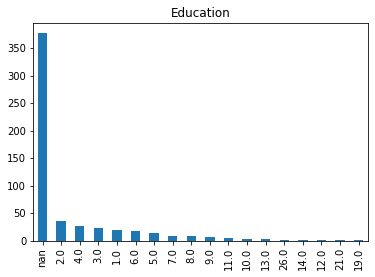


_______________________       Lodging/residential         _________________________
NaN     129
8.0       4
7.0       3
2.0       2
3.0       2
1.0       1
5.0       1
4.0       1
9.0       1
10.0      1
16.0      1
6.0       1
Name: floor_count, dtype: int64


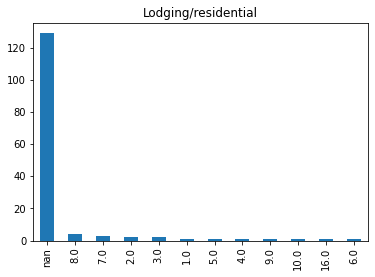


_______________________       Office         _________________________
NaN     239
1.0      12
2.0       8
8.0       6
3.0       4
4.0       4
5.0       3
12.0      1
7.0       1
11.0      1
Name: floor_count, dtype: int64


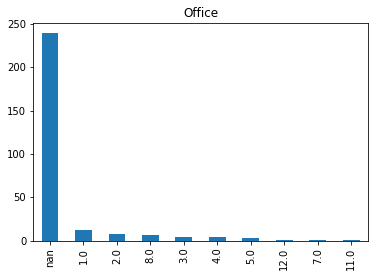


_______________________       Entertainment/public assembly         _________________________
NaN    128
1.0     31
2.0     14
5.0      3
3.0      2
4.0      2
6.0      2
8.0      1
9.0      1
Name: floor_count, dtype: int64


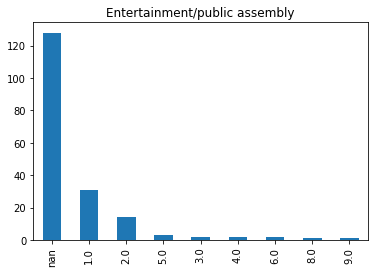


_______________________       Other         _________________________
1.0    12
NaN    12
2.0     1
Name: floor_count, dtype: int64


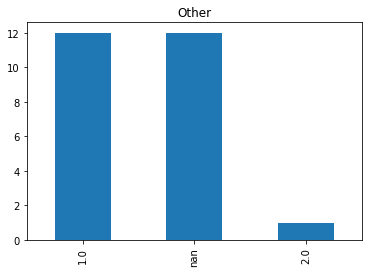


_______________________       Retail         _________________________
NaN    9
2.0    1
1.0    1
Name: floor_count, dtype: int64


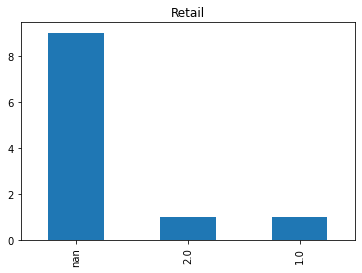


_______________________       Parking         _________________________
NaN    19
5.0     1
2.0     1
1.0     1
Name: floor_count, dtype: int64


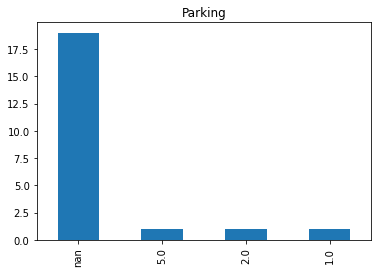


_______________________       Public services         _________________________
NaN    115
1.0     28
3.0      3
6.0      3
2.0      2
4.0      2
5.0      2
7.0      1
Name: floor_count, dtype: int64


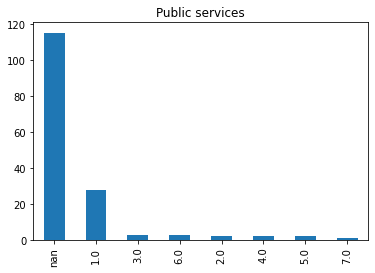


_______________________       Warehouse/storage         _________________________
NaN    11
1.0     2
Name: floor_count, dtype: int64


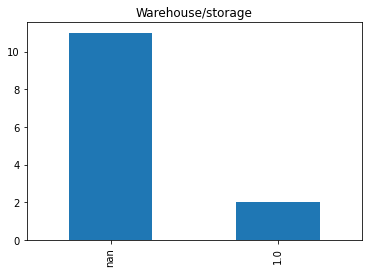


_______________________       Food sales and service         _________________________
NaN    5
Name: floor_count, dtype: int64


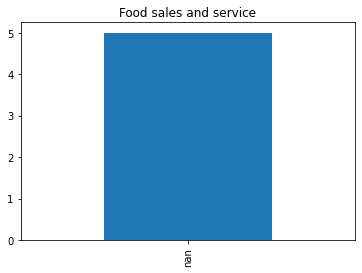


_______________________       Religious worship         _________________________
NaN    3
Name: floor_count, dtype: int64


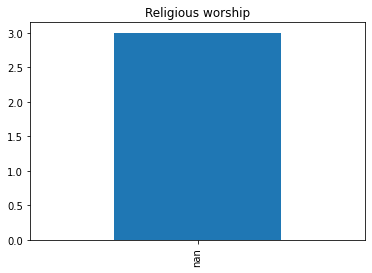


_______________________       Healthcare         _________________________
NaN    22
1.0     1
Name: floor_count, dtype: int64


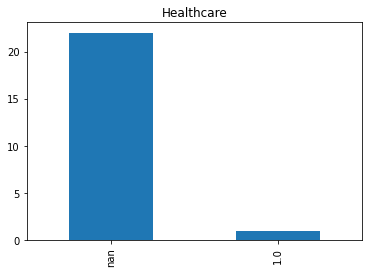


_______________________       Utility         _________________________
NaN    3
2.0    1
Name: floor_count, dtype: int64


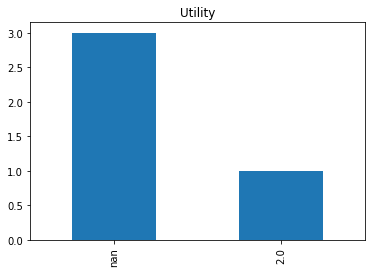


_______________________       Technology/science         _________________________
NaN    3
6.0    1
5.0    1
4.0    1
Name: floor_count, dtype: int64


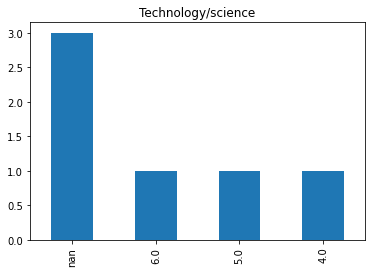


_______________________       Manufacturing/industrial         _________________________
NaN    9
2.0    2
1.0    1
Name: floor_count, dtype: int64


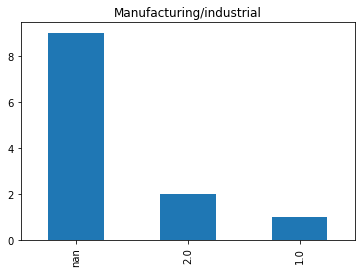


_______________________       Services         _________________________
NaN    10
Name: floor_count, dtype: int64


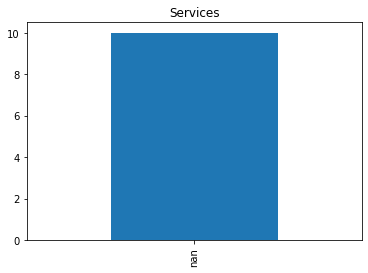

In [ ]:
for val in building_metadata.primary_use.unique():
  print("\n_______________________      ",val,"        _________________________")
  print(building_metadata[building_metadata['primary_use']==val].floor_count.value_counts(dropna=False))
  building_metadata[building_metadata['primary_use']==val].floor_count.value_counts(dropna=False).plot(kind="bar",title=val)
  plt.show()

> > ### Further check to make sure that the floor_counts missing value has nothing to do with the year that building with built. 


_______________________       1900 - 1909         _________________________
NaN    14
3.0     3
6.0     3
2.0     1
4.0     1
8.0     1
9.0     1
7.0     1
Name: floor_count, dtype: int64


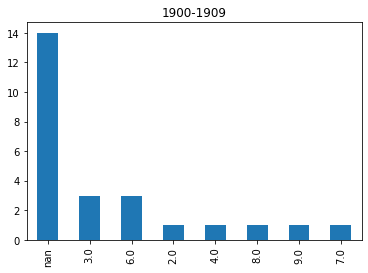


_______________________       1910 - 1919         _________________________
NaN    22
2.0     9
4.0     6
5.0     6
3.0     3
1.0     2
8.0     1
Name: floor_count, dtype: int64


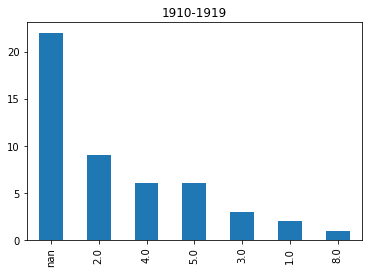


_______________________       1920 - 1929         _________________________
NaN    18
3.0     3
4.0     3
5.0     2
1.0     1
6.0     1
2.0     1
Name: floor_count, dtype: int64


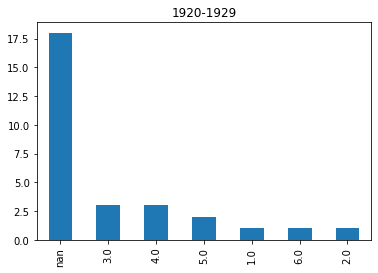


_______________________       1930 - 1939         _________________________
NaN    26
6.0     3
8.0     3
3.0     2
4.0     1
1.0     1
7.0     1
Name: floor_count, dtype: int64


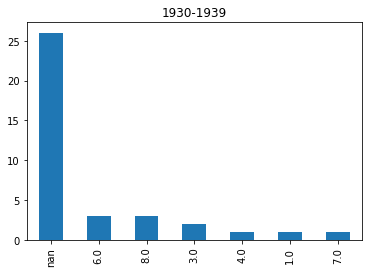


_______________________       1940 - 1949         _________________________
NaN    20
5.0     4
2.0     2
6.0     2
4.0     1
3.0     1
7.0     1
Name: floor_count, dtype: int64


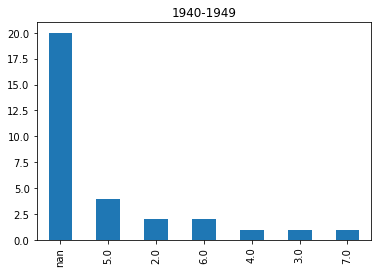


_______________________       1950 - 1959         _________________________
NaN     33
8.0      3
9.0      3
6.0      3
5.0      2
4.0      2
3.0      2
1.0      2
2.0      2
7.0      1
13.0     1
Name: floor_count, dtype: int64


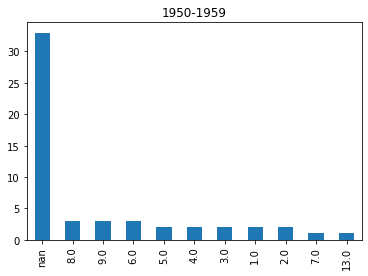


_______________________       1960 - 1969         _________________________
NaN     62
2.0      7
4.0      6
3.0      6
1.0      5
8.0      5
7.0      4
6.0      4
11.0     3
9.0      3
10.0     2
12.0     1
16.0     1
Name: floor_count, dtype: int64


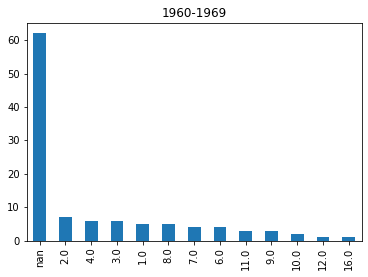


_______________________       1970 - 1979         _________________________
NaN     48
2.0     23
1.0     17
3.0      6
5.0      3
4.0      2
7.0      2
26.0     1
21.0     1
13.0     1
6.0      1
8.0      1
14.0     1
Name: floor_count, dtype: int64


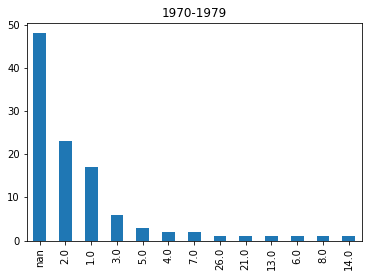


_______________________       1980 - 1989         _________________________
NaN    39
2.0     1
3.0     1
6.0     1
Name: floor_count, dtype: int64


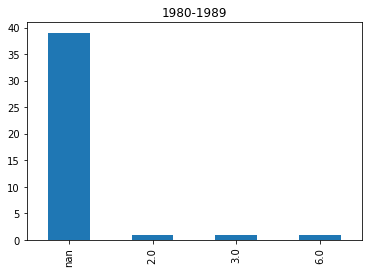


_______________________       1990 - 1999         _________________________
NaN     31
8.0      4
2.0      2
4.0      2
6.0      2
19.0     1
10.0     1
7.0      1
1.0      1
Name: floor_count, dtype: int64


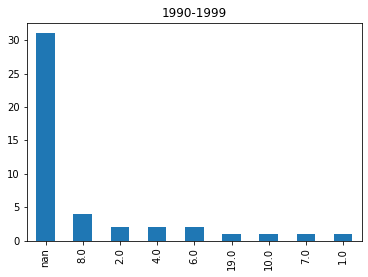


_______________________       2000 - 2009         _________________________
NaN     82
5.0      2
4.0      2
11.0     1
12.0     1
3.0      1
7.0      1
8.0      1
10.0     1
Name: floor_count, dtype: int64


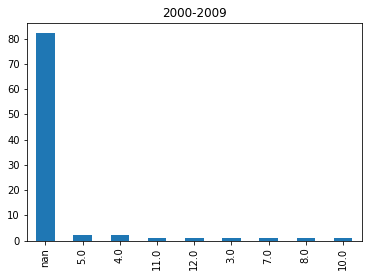

In [ ]:
# for val in  np.sort(building_metadata.year_built.unique()):
for val in  range(1900,2010,10):
  print("\n_______________________      ",val,"-",val+9,"        _________________________")
  counts=building_metadata[np.logical_and(building_metadata['year_built']>=val , building_metadata['year_built']<(val+10))].floor_count.value_counts(dropna=False)
  print(counts)
  counts.plot(kind="bar",title=f"{val}-{val+9}")
  plt.show()

> > ### Replacing The Nan in floor_count with 0

In [ ]:
train_data["floor_count"]=train_data.floor_count.fillna(0)

In [ ]:
del building_metadata
train_data

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year,day,hour,day_of_year,DayOfWeek,Holiday,Weekend,Time_of_Day,Working_Hours,Quarter
0,0,0,2016-01-01 00:00:00,0.000000,0,Education,7432,2008.0,0.0,25.000000,6.0,20.000000,1.793945,1019.5,0.0,0.000000,1,2016,1,0,1,4,True,False,Late Night,False,1st_quarter
1,1,0,2016-01-01 00:00:00,0.000000,0,Education,2720,2004.0,0.0,25.000000,6.0,20.000000,1.793945,1019.5,0.0,0.000000,1,2016,1,0,1,4,True,False,Late Night,False,1st_quarter
2,2,0,2016-01-01 00:00:00,0.000000,0,Education,5376,1991.0,0.0,25.000000,6.0,20.000000,1.793945,1019.5,0.0,0.000000,1,2016,1,0,1,4,True,False,Late Night,False,1st_quarter
3,3,0,2016-01-01 00:00:00,0.000000,0,Education,23685,2002.0,0.0,25.000000,6.0,20.000000,1.793945,1019.5,0.0,0.000000,1,2016,1,0,1,4,True,False,Late Night,False,1st_quarter
4,4,0,2016-01-01 00:00:00,0.000000,0,Education,116607,1975.0,0.0,25.000000,6.0,20.000000,1.793945,1019.5,0.0,0.000000,1,2016,1,0,1,4,True,False,Late Night,False,1st_quarter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125600,1400,1,2016-03-24 12:00:00,15.375300,15,Lodging/residential,21168,1928.0,0.0,1.700195,0.0,1.700195,1.401367,1017.0,0.0,0.000000,3,2016,24,12,84,3,False,False,Afternoon,True,1st_quarter
20125601,1400,1,2016-03-24 13:00:00,25.084801,15,Lodging/residential,21168,1928.0,0.0,2.800781,0.0,2.199219,1.401367,1016.5,320.0,1.500000,3,2016,24,13,84,3,False,False,Afternoon,True,1st_quarter
20125602,1400,1,2016-03-24 14:00:00,32.343899,15,Lodging/residential,21168,1928.0,0.0,5.601562,0.0,4.398438,1.401367,1015.0,110.0,2.099609,3,2016,24,14,84,3,False,False,Afternoon,True,1st_quarter
20125603,1400,1,2016-03-24 15:00:00,24.221399,15,Lodging/residential,21168,1928.0,0.0,11.101562,0.0,4.398438,1.401367,1014.0,150.0,5.101562,3,2016,24,15,84,3,False,False,Afternoon,True,1st_quarter


Text(0.5, 1.0, 'corr_heat_map')

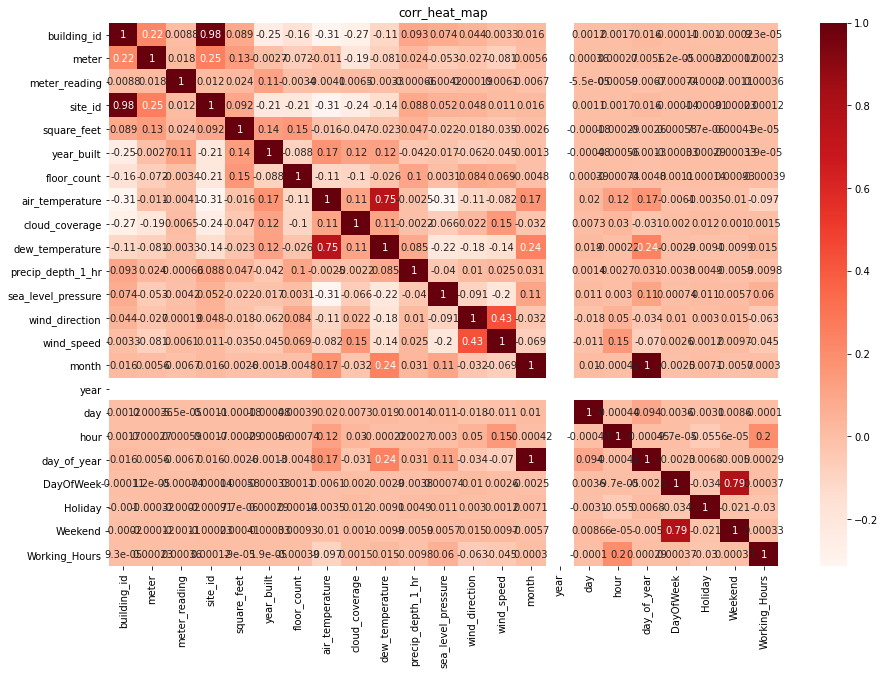

In [ ]:
#plt.imshow(corr_matrix,cmap='hot',interpolation='nearest')
fig, heatmap = plt.subplots(figsize = (15,10))
heatmap = sns.heatmap(train_data.corr(), cmap='Reds', annot=True)
heatmap.set_title('corr_heat_map')



> #### 1. From heatmap we can see that the dew temperature is highly correlated with the air temperature (0.75).



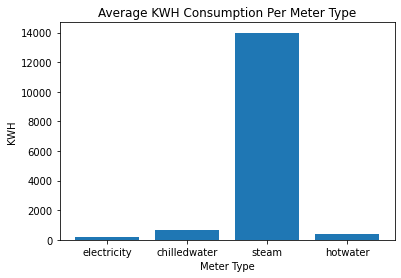

In [ ]:
df=train_data[["meter","meter_reading"]].set_index("meter").groupby(level="meter").mean()
df["type"]=["electricity", "chilledwater", "steam", "hotwater"]
plt.bar(df.type,df.meter_reading)
plt.title("Average KWH Consumption Per Meter Type")
plt.xlabel("Meter Type")
plt.ylabel("KWH")
plt.show()

> #### 2. Average consumption of kwh is clearly much higher in steam 

> #### Daily Consumption All buildings
> ##### There is an outlier day between day 300 and 350. This day might signify a certain occasion so the observations are not considered incorrect

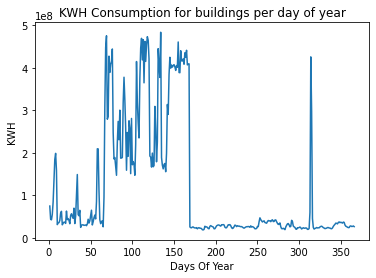

In [ ]:
train_data['day']= pd.DatetimeIndex(train_data['timestamp']).dayofyear
df=train_data[["day","meter_reading"]].set_index("day").groupby(level="day").sum()
plt.plot(df)
plt.title(f"KWH Consumption for buildings per day of year")
plt.xlabel("Days Of Year")
plt.ylabel("KWH")
plt.show()

> #### Monthly Consumption All buildings
> ##### Consumption peaked in April and May

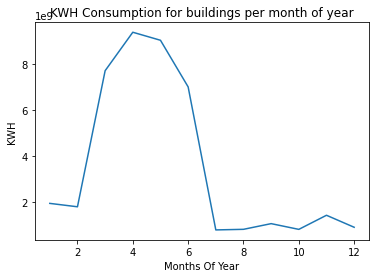

In [ ]:
train_data['month'] = pd.DatetimeIndex(train_data['timestamp']).month
df=train_data[["month","meter_reading"]].set_index("month").groupby(level="month").sum()
plt.plot(df)
plt.title(f"KWH Consumption for buildings per month of year")
plt.xlabel("Months Of Year")
plt.ylabel("KWH")
plt.show()

> #### Check For the distribution of available data for every month
> ##### The distribution is uniform, everything looks normal.

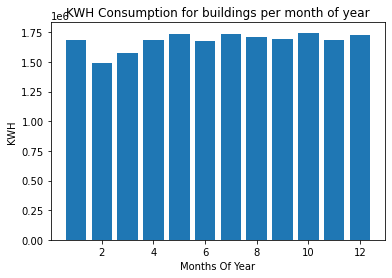

In [ ]:
df=train_data[["month","meter_reading"]].set_index("month").groupby(level="month").count()
df=df.reset_index()
plt.bar(df.month,df.meter_reading)
plt.title(f"KWH Consumption for buildings per month of year")
plt.xlabel("Months Of Year")
plt.ylabel("KWH")
plt.show()

> #### Visualizing the consumption of 10 buildings over the year

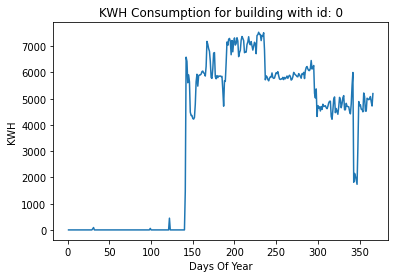

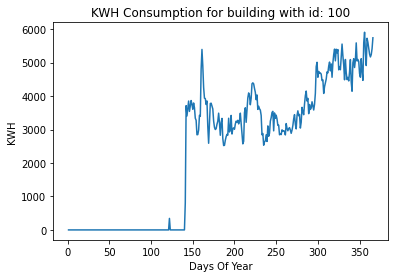

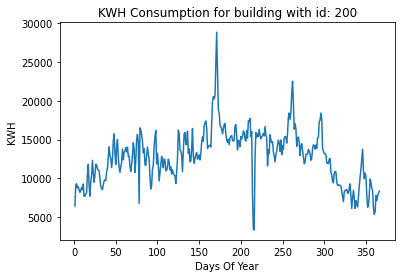

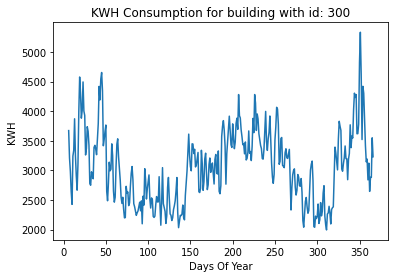

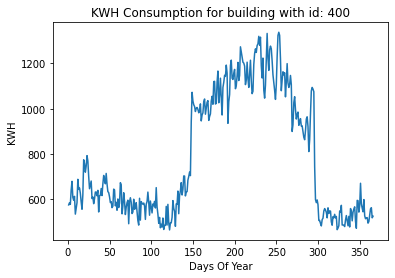

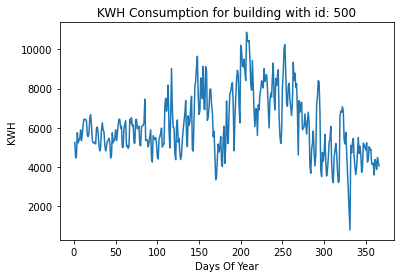

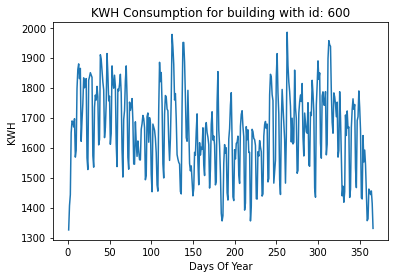

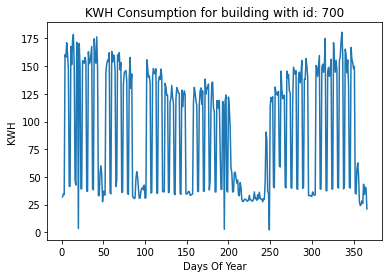

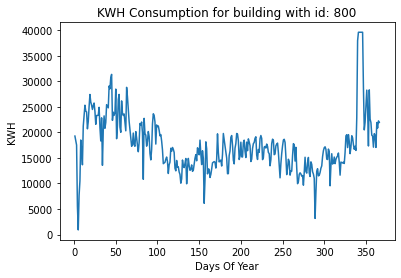

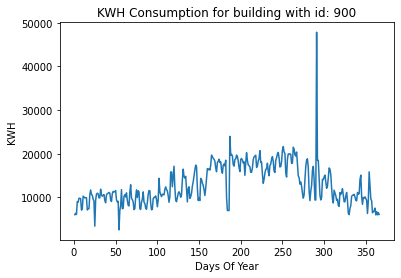

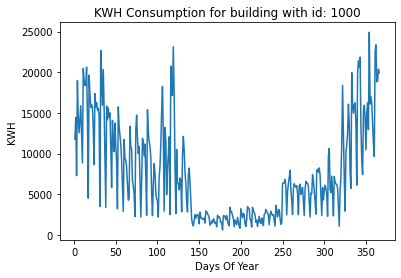

In [ ]:
train_data['day']= pd.DatetimeIndex(train_data['timestamp']).dayofyear
for building_id in range(0,1001,100):
  df=train_data[train_data["building_id"]==building_id][["day","meter_reading"]].set_index("day").groupby(level="day").sum()
  plt.plot(df)
  plt.title(f"KWH Consumption for building with id: {building_id}")
  plt.xlabel("Days Of Year")
  plt.ylabel("KWH")
  plt.show()

> #### Average KWH Consumption for sites
> ##### It is clear that site 13 is using much higher consumption that the other sites

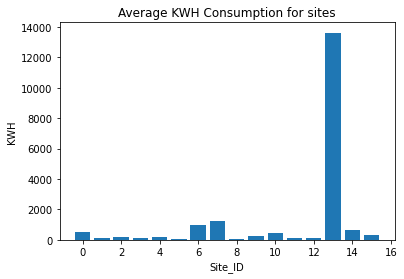

In [ ]:
df=train_data[["site_id","meter_reading"]].set_index("site_id").groupby(level="site_id").mean()
df=df.reset_index()
plt.bar(df.site_id,df.meter_reading)
plt.title(f"Average KWH Consumption for sites")
plt.xlabel("Site_ID")
plt.ylabel("KWH")
plt.show()

> #### Investigating the range of consumption values for site 13
> ##### Heavily right skewed
> ##### Although Building 1099 has much higher consumption than other buildings, the log transformation solves this

In [ ]:
train_data[["site_id","meter_reading"]][train_data["site_id"]==13].describe()

,site_id,meter_reading
count,2711454.0,2.711454e+06
mean,13.0,1.348079e+04
std,0.0,4.179253e+05
min,13.0,0.000000e+00
25%,13.0,2.372600e+01
50%,13.0,1.194750e+02
75%,13.0,5.544450e+02
max,13.0,2.190470e+07


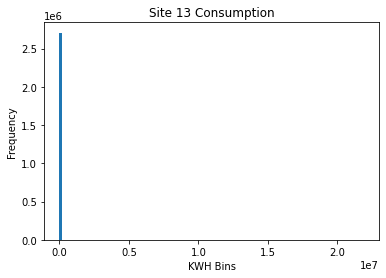

In [ ]:
df=train_data[["site_id","meter_reading"]][train_data["site_id"]==13]
df=df.reset_index()
plt.hist(df.meter_reading,bins=100)
plt.title(f"Site 13 Consumption")
plt.xlabel("KWH Bins")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.sort_values(by="meter_reading",ascending=False)

,index,site_id,meter_reading
1218074,14388757,13,21904700.0
1195875,14366558,13,21889900.0
1195566,14366249,13,21874500.0
2323200,15493883,13,21847900.0
1217766,14388449,13,21844500.0
...,...,...,...
1781715,14952398,13,0.0
2461769,15632452,13,0.0
130321,13301004,13,0.0
452144,13622827,13,0.0


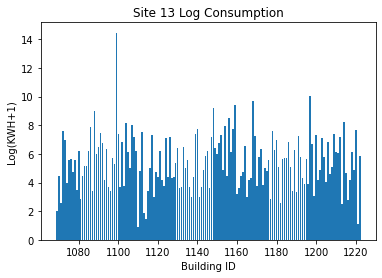

In [ ]:
df=train_data[train_data["site_id"]==13][["building_id","meter_reading"]].set_index("building_id").groupby(level="building_id").mean()
df=df.reset_index()
plt.bar(df.building_id,np.log(df.meter_reading+1))
plt.title(f"Site 13 Log Consumption")
plt.xlabel("Building ID")
plt.ylabel("Log(KWH+1)")
plt.show()

> #### Average KWH Consumption for primary use 
> ##### Education and Services buildings have the highest average consumption

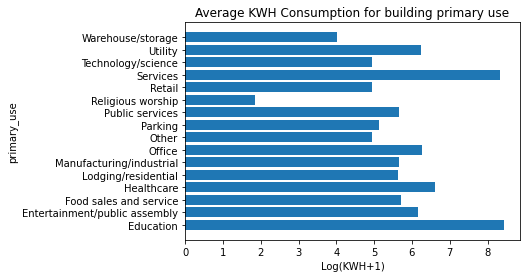

In [ ]:
df=train_data[["primary_use","meter_reading"]].set_index("primary_use").groupby(level="primary_use").mean()
df=df.reset_index()
plt.barh(df.primary_use,np.log(df.meter_reading+1))
plt.title(f"Average KWH Consumption for building primary use")
plt.ylabel("primary_use")
plt.xlabel("Log(KWH+1)")
plt.show()

> #### Relationship between log consumption and square_feet

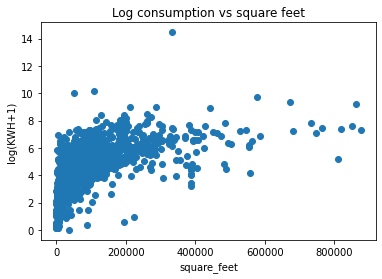

In [ ]:
df=train_data[["building_id","square_feet","meter_reading"]].set_index("building_id").groupby(level="building_id").mean()
plt.scatter(df.square_feet,np.log(df.meter_reading+1))
plt.title("Log consumption vs square feet")
plt.xlabel("square_feet")
plt.ylabel("log(KWH+1)")
plt.show()

> #### Relationship between log consumption and log square_feet
> ##### Linear relationship is much more obvious here

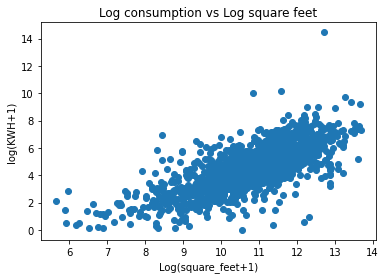

In [ ]:
df=train_data[["building_id","square_feet","meter_reading"]].set_index("building_id").groupby(level="building_id").mean()
plt.scatter(np.log(df.square_feet+1),np.log(df.meter_reading+1))
plt.title("Log consumption vs Log square feet")
plt.xlabel("Log(square_feet+1)")
plt.ylabel("log(KWH+1)")
plt.show()

> #### Decade of building effect on the consumption
> ##### The uniformity of the distribution tells there is no effect by the decade on the consumption

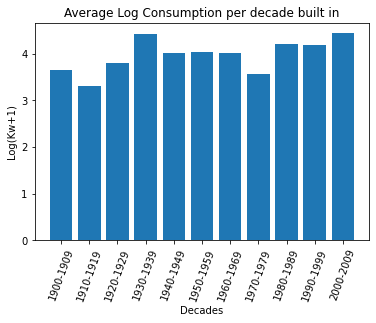

In [ ]:
vals=[]
labels=[]
for val in  range(1900,2010,10):
  consumption=np.mean(np.log(train_data[np.logical_and(train_data['year_built']>=val , train_data['year_built']<(val+10))].meter_reading+1))
  vals.append(consumption)
  labels.append(f"{val}-{val+9}")

plt.bar(labels,vals)
plt.xticks(rotation=70)
plt.title("Average Log Consumption per decade built in")
plt.xlabel("Decades")
plt.ylabel("Log(Kw+1)")
plt.show()

> #### Air Temperature effect on average log consumption
> ##### There seems not to be a strong relationship, strangely!

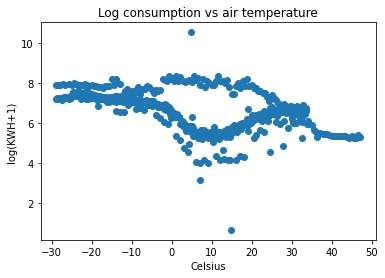

In [ ]:
df=train_data[["air_temperature","meter_reading"]].set_index("air_temperature").groupby(level="air_temperature").mean()
df=df.reset_index()
plt.scatter(df.air_temperature,np.log(df.meter_reading+1))
plt.title("Log consumption vs air temperature")
plt.xlabel("Celsius")
plt.ylabel("log(KWH+1)")
plt.show()

> #### Cloud coverage effect on consumption

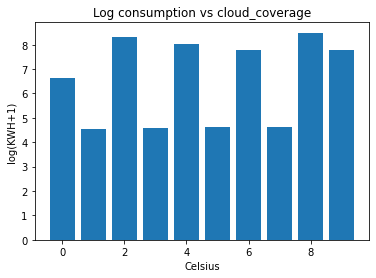

In [ ]:
df=train_data[["cloud_coverage","meter_reading"]].set_index("cloud_coverage").groupby(level="cloud_coverage").mean()
df=df.reset_index()
plt.bar(df.cloud_coverage,np.log(df.meter_reading+1))
plt.title("Log consumption vs cloud_coverage")
plt.xlabel("Celsius")
plt.ylabel("log(KWH+1)")
plt.show()

> #### Average Sea level per day pressure effect on log consumption

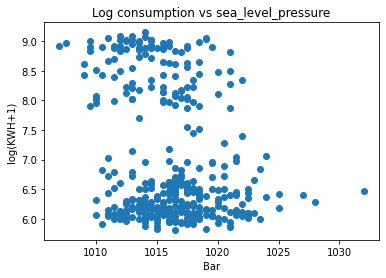

In [ ]:
df=train_data[["day_of_year","sea_level_pressure","meter_reading"]].set_index("day_of_year").groupby(level="day_of_year").mean()
df=df.reset_index()
plt.scatter(df.sea_level_pressure,np.log(df.meter_reading+1))
plt.title("Log consumption vs sea_level_pressure")
plt.xlabel("Bar")
plt.ylabel("log(KWH+1)")
plt.show()

# Transformations

In [ ]:
import gc
# Dropping less important columns 
train_data.drop(['building_id','timestamp', 'year_built' ,'year','site_id',
                              'dew_temperature', 'wind_direction', 'day', 
                            'DayOfWeek'], axis='columns', inplace=True)

In [ ]:
# Transforming the target variable
train_data.meter_reading=np.log(train_data.meter_reading+1)

# Transforming the square feet based on eda
train_data.square_feet=np.log(train_data.square_feet)

> ### Scaling the Data (one hot encoding, min-max scaling, cyclic scaling)

In [ ]:
#### min-max scaling for numerical variables:
from sklearn.preprocessing import MinMaxScaler 
train_data['square_feet']= MinMaxScaler().fit_transform(np.array(train_data['square_feet']).reshape(-1,1))
train_data['floor_count']= MinMaxScaler().fit_transform(np.array(train_data['floor_count']).reshape(-1,1))
train_data['air_temperature']= MinMaxScaler().fit_transform(np.array(train_data['air_temperature']).reshape(-1,1))
train_data['cloud_coverage']= MinMaxScaler().fit_transform(np.array(train_data['cloud_coverage']).reshape(-1,1))
#train_data['dew_temperature']= MinMaxScaler().fit_transform(np.array(train_data['dew_temperature']).reshape(-1,1))
train_data['precip_depth_1_hr']= MinMaxScaler().fit_transform(np.array(train_data['precip_depth_1_hr']).reshape(-1,1))
train_data['sea_level_pressure']= MinMaxScaler().fit_transform(np.array(train_data['sea_level_pressure']).reshape(-1,1))
train_data['wind_speed']= MinMaxScaler().fit_transform(np.array(train_data['wind_speed']).reshape(-1,1))
train_data['day_of_year']= MinMaxScaler().fit_transform(np.array(train_data['day_of_year']).reshape(-1,1))

####one hot encoding the nominal columns
y = pd.get_dummies(train_data.meter)
y.columns= ['zero_meter', 'one_meter', 'two_meter', 'three_meter']
train_data= pd.concat([train_data, y], axis=1)

y = pd.get_dummies(train_data.primary_use)
train_data= pd.concat([train_data, y], axis=1)

y = pd.get_dummies(train_data.Time_of_Day)
train_data= pd.concat([train_data, y], axis=1)

y = pd.get_dummies(train_data.Quarter)
train_data= pd.concat([train_data, y], axis=1)

#### Cyclic Encoding of the cyclic features
import math
train_data['month'] = 2 * math.pi * train_data['month'] / train_data['month'].max()
train_data['month'] = np.cos(train_data['month'])

train_data['hour'] = 2 * math.pi * train_data['hour'] / train_data['hour'].max()
train_data['hour'] = np.cos(train_data['hour'])

#train_data['day'] = 2 * math.pi * train_data['day'] / train_data['day'].max()
#train_data['day'] = np.cos(train_data['day'])

####Label Encoding:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data['Working_Hours'] = le.fit_transform(train_data['Working_Hours'])
train_data['Weekend'] = le.fit_transform(train_data['Weekend'])
train_data['Holiday'] = le.fit_transform(train_data['Holiday'])

In [ ]:
train_data=train_data.drop(columns=['meter', 'primary_use', 'Time_of_Day', 'Quarter'])
train_data

,meter_reading,square_feet,floor_count,air_temperature,cloud_coverage,precip_depth_1_hr,sea_level_pressure,wind_speed,month,hour,day_of_year,Holiday,Weekend,Working_Hours,zero_meter,one_meter,two_meter,three_meter,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage,Afternoon,Dawn,Evening,Late Night,Morning,Night,1st_quarter,2nd_quarter,3rd_quarter,4th_quarter
0,0.000000,0.406656,0.0,0.708008,0.666504,0.008118,0.664062,0.000000,8.660254e-01,1.000000,0.000000,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0.000000,0.281582,0.0,0.708008,0.666504,0.008118,0.664062,0.000000,8.660254e-01,1.000000,0.000000,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0.000000,0.366359,0.0,0.708008,0.666504,0.008118,0.664062,0.000000,8.660254e-01,1.000000,0.000000,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0.000000,0.550878,0.0,0.708008,0.666504,0.008118,0.664062,0.000000,8.660254e-01,1.000000,0.000000,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0.000000,0.749218,0.0,0.708008,0.666504,0.008118,0.664062,0.000000,8.660254e-01,1.000000,0.000000,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125600,2.795774,0.536898,0.0,0.402344,0.000000,0.006981,0.632812,0.000000,6.123234e-17,-0.990686,0.227397,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
20125601,3.261353,0.536898,0.0,0.416748,0.000000,0.006981,0.625000,0.078979,6.123234e-17,-0.917211,0.227397,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
20125602,3.506875,0.536898,0.0,0.453613,0.000000,0.006981,0.601562,0.110535,6.123234e-17,-0.775711,0.227397,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
20125603,3.227693,0.536898,0.0,0.525879,0.000000,0.006981,0.593750,0.268555,6.123234e-17,-0.576680,0.227397,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
train_data = train_data.loc[:,~train_data.columns.duplicated()]

In [ ]:
train_data = reduce_mem_usage(train_data)

Memory usage after optimization is: 1209.18 MB
Decreased by 42.7%


In [ ]:
gc.collect()
train_labels = train_data["meter_reading"]
train_data.drop("meter_reading",axis=1,inplace=True)
train_data.columns

Index(['square_feet', 'floor_count', 'air_temperature', 'cloud_coverage',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_speed', 'month',
       'hour', 'day_of_year', 'Holiday', 'Weekend', 'Working_Hours',
       'zero_meter', 'one_meter', 'two_meter', 'three_meter', 'Education',
       'Entertainment/public assembly', 'Food sales and service', 'Healthcare',
       'Lodging/residential', 'Manufacturing/industrial', 'Office', 'Other',
       'Parking', 'Public services', 'Religious worship', 'Retail', 'Services',
       'Technology/science', 'Utility', 'Warehouse/storage', 'Afternoon',
       'Dawn', 'Evening', 'Late Night', 'Morning', 'Night', '1st_quarter',
       '2nd_quarter', '3rd_quarter', '4th_quarter'],
      dtype='object')

# Modeling

In [ ]:
# Splitting the data to training and validation
from sklearn.model_selection import train_test_split
partial_train_data, val_data, partial_train_labels, val_labels = train_test_split(
     train_data, train_labels, test_size=0.33, random_state=42)

In [ ]:
del train_labels,train_data
gc.collect()

> ### Linear Regression

In [ ]:
gc.collect()
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(partial_train_data, partial_train_labels)

from sklearn.metrics import mean_squared_error

pred = reg.predict(val_data)

print("Training RMSLE: ",mean_squared_error(partial_train_labels, reg.predict(partial_train_data), squared=False))
print("Validation RMSLE: ",mean_squared_error(val_labels, pred, squared=False))

Training RMSLE:  2.0127738
Validation RMSLE:  2.0141575


> ### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1.0).fit(partial_train_data, partial_train_labels)

from sklearn.metrics import mean_squared_error
pred = reg.predict(val_data)

print("Training RMSLE: ",mean_squared_error(partial_train_labels, reg.predict(partial_train_data), squared=False))
print("Validation RMSLE: ",mean_squared_error(val_labels, pred, squared=False))

Training RMSLE:  1.8611353104932964
Validation RMSLE:  1.862313926911162


> ### Lasso Regression

In [ ]:
gc.collect()
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.001).fit(partial_train_data, partial_train_labels)

pred = reg.predict(val_data)

print("Training RMSLE: ",mean_squared_error(partial_train_labels, reg.predict(partial_train_data), squared=False))
print("Validation RMSLE: ",mean_squared_error(val_labels, pred, squared=False))

Training RMSLE:  1.8621655088945144
Validation RMSLE:  1.8633477082635987


> ### Lasso and Ridge with GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

gc.collect()


lasso_params = {'alpha':[0.02, 0.025, 0.026, 0.03, 0.04, 0.06]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}


reg = GridSearchCV(linear_model.Lasso(), 
                     param_grid=lasso_params).fit(partial_train_data, 
                     partial_train_labels).best_estimator_


pred = reg.predict(val_data)

print("Training RMSLE: ",mean_squared_error(partial_train_labels, reg.predict(partial_train_data), squared=False))
print("Validation RMSLE: ",mean_squared_error(val_labels, pred, squared=False))


Training RMSLE:  1.8916107957618973
Validation RMSLE:  1.8924688878870088


In [ ]:
reg

Lasso(alpha=0.02)

In [ ]:
reg = GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(partial_train_data, 
                     partial_train_labels).best_estimator_

pred = reg.predict(val_data)

print("Training RMSLE: ",mean_squared_error(partial_train_labels, reg.predict(partial_train_data), squared=False))
print("Validation RMSLE: ",mean_squared_error(val_labels, pred, squared=False))

print(reg)

Training RMSLE:  1.8611358210279996
Validation RMSLE:  1.8623142407356073
Ridge(alpha=200)


> ### Random Forrest regressor

In [ ]:
#random forrest with no normalization and one hot encoding
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(partial_train_data, partial_train_labels)


RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error

pred = regr.predict(val_data)

rms = mean_squared_error(val_labels, pred, squared=False)
rms

1.9311565536525919

> ### light gbm

In [ ]:
import lightgbm as lgb

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 10000,
    "n_estimators": 1000
}

gbm = lgb.LGBMRegressor(**hyper_params)

gbm.fit(partial_train_data, partial_train_labels,
        eval_set=(val_data, val_labels), 
        eval_metric='l2')



/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.067949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_w

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8, metric=['l2'],
              n_estimators=1000, num_iterations=10000, num_leaves=128,
              objective='regression', task='train', verbose=0)

> ### StackingRegressor ensumbling

In [ ]:
del reg
del pred
gc.collect()
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

stregr = StackingRegressor(regressors=[LinearRegression(), Ridge(random_state=1),
                                       RandomForestRegressor(n_estimators=10,max_depth= 20, 
                                         random_state=42)] 
                           ,meta_regressor=GradientBoostingRegressor(n_estimators=50, max_depth= 20))

stregr.fit(partial_train_data, partial_train_labels)

#takes 6 hrs to finish

StackingRegressor(meta_regressor=GradientBoostingRegressor(max_depth=20,
                                                           n_estimators=50),
                  regressors=[LinearRegression(), Ridge(random_state=1),
                              RandomForestRegressor(max_depth=20,
                                                    n_estimators=10,
                                                    random_state=42)])

In [ ]:
gc.collect()
stack_pred=stregr.predict(val_data)

print("Training RMSLE: ",mean_squared_error(partial_train_labels, stregr.predict(partial_train_data), squared=False))
print("Validation RMSLE: ",mean_squared_error(val_labels, stack_pred, squared=False))

Training RMSLE:  0.6082892335954128
Validation RMSLE:  0.7722455693530248


In [ ]:
# save the model to disk
import pickle
filename = 'finalized_model_1.sav'
pickle.dump(stregr, open(filename, 'wb'))

In [ ]:
#./finalized_model_1.sav
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
from IPython.display import FileLink
FileLink(r'./finalized_model_1.sav')

/kaggle/working/finalized_model_1.sav


## Conclusions
*   We tried several models from the simplest to emsembling methods
*   Linear regression surprisingly got good results on our validation set (33% of the data)
*   after that we tried lasso and ridge regression which lowered the rmse slightly which is expected
*   Random forrest is worse than lasso and ridge regression in results but better than linear regression
*   then we tried light gbm which had great results (0.93) compared to the past models which is expected (for 10,000 iterations and 1000 trees), it trained for about 5 hrs
*   the best is the StackingRegressor ensumbling were we stacked linear regression, ridge, random forrest and xgboost together and got a very good result of **0.77 rmse**, it trained for about 6 hrs


